In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_dir="/content/drive/MyDrive/Flower"
img_width, img_height = 128, 128
batch_size=32
train_datagen = ImageDataGenerator(
rescale=1.0/255,
rotation_range=30,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode="nearest"
)

In [17]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode="categorical"
)
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])

Found 500 images belonging to 5 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,941,381 (49.37 MB)

 Trainable params: 12,941,381 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6324 - loss: 0.7467
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6881 - loss: 0.6152
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7014 - loss: 0.5384
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7135 - loss: 0.5467
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6875 - loss: 0.5548
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7585 - loss: 0.5135
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7147 - loss: 0.4967
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7254 - loss: 0.5169
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7164 - loss: 0.5234
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7468 - loss: 0.4452


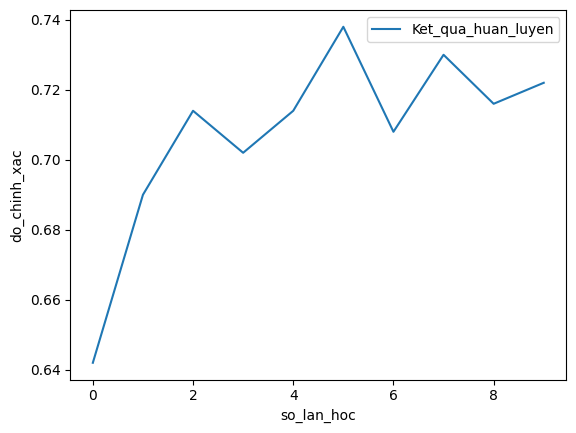

In [19]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
epochs = 10
history = model.fit(train_generator, epochs=epochs)
plt.plot(history.history["accuracy"], label="Ket_qua_huan_luyen")
plt.ylabel("do_chinh_xac")
plt.xlabel("so_lan_hoc")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


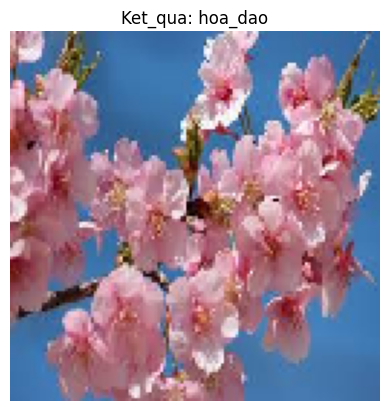

Ket_qua_du_doan: hoa_dao - Anh: hoadao1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


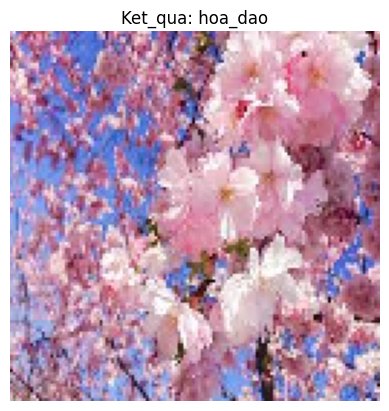

Ket_qua_du_doan: hoa_dao - Anh: hoadao2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


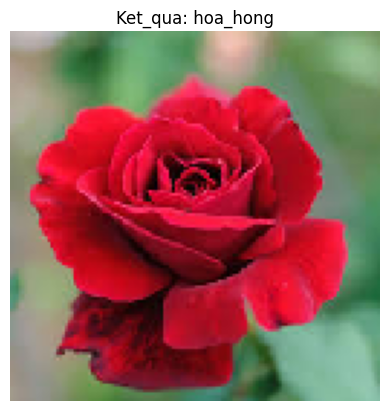

Ket_qua_du_doan: hoa_hong - Anh: hoahong1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


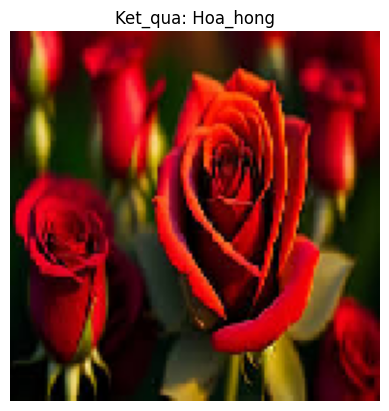

Ket_qua_du_doan: Hoa_hong - Anh: hoahong2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


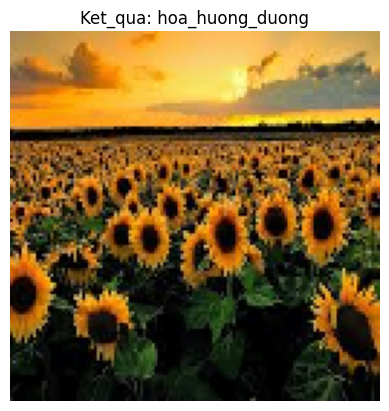

Ket_qua_du_doan: hoa_huong_duong - Anh: hoahuongduong.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


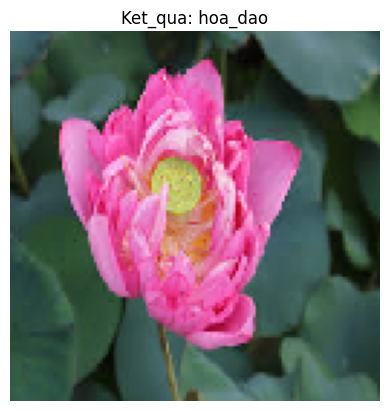

Ket_qua_du_doan: hoa_dao - Anh: hoasen.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


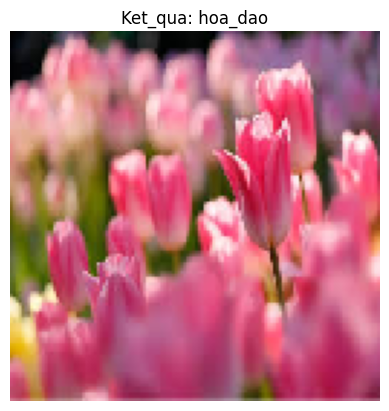

Ket_qua_du_doan: hoa_dao - Anh: hoatulip1.jpg


In [20]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
import os
image_paths = [
    "/content/hoadao1.jpg",
    "/content/hoadao2.jpg",
    "/content/hoahong1.jpg",
    "/content/hoahong2.jpg",
    "/content/hoahuongduong.jpg",
    "/content/hoasen.jpg",
    "/content/hoatulip1.jpg"
]
img_size = (128, 128)
class_label = {v: k for k, v in train_generator.class_indices.items()}
for path in image_paths:
    try:
        img = load_img(path, target_size=img_size)
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, *img_size, 3)
        prediction = np.argmax(model.predict(img_array))
        person_name = class_label.get(prediction, "Khong_xac_dinh")
        plt.imshow(img)
        plt.title(f"Ket_qua: {person_name}")
        plt.axis("off")
        plt.show()
        print(f"Ket_qua_du_doan: {person_name} - Anh: {os.path.basename(path)}")
    except Exception as e:
        print(f"Loi_khi_xu_li_anh {path}: {e}")